In [1]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
#    -O D:\Projects\NLP\dataset\bbc-text.csv


In [2]:
import csv
import re
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  

In [4]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could",
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has",
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him",
             "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it",
             "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once",
             "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she",
             "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their",
             "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're",
             "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd",
             "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while",
             "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your",
             "yours", "yourself", "yourselves" ];

In [5]:
sentences = []
labels = []
with open('dataset/bbc-text.csv' , 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader,None)
    for row in reader:
        labels.append(row[0])       
        sentence = row[1]
        
        for word in stopwords:
            token = " {} ".format(word)
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        
        sentences.append(sentence)


In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [7]:
train_size = 1780

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

In [8]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding= padding_type , maxlen = max_length)

In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding= padding_type , maxlen = max_length)

In [10]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array( label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq =  np.array( label_tokenizer.texts_to_sequences(validation_labels))


In [13]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs =30
history = model.fit(train_padded, training_label_seq , epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), verbose = 2)

Epoch 1/30
56/56 - 0s - loss: 1.7683 - accuracy: 0.4067 - val_loss: 1.7345 - val_accuracy: 0.5303
Epoch 2/30
56/56 - 0s - loss: 1.6707 - accuracy: 0.6758 - val_loss: 1.6007 - val_accuracy: 0.6921
Epoch 3/30
56/56 - 0s - loss: 1.4670 - accuracy: 0.7966 - val_loss: 1.3621 - val_accuracy: 0.8270
Epoch 4/30
56/56 - 0s - loss: 1.1624 - accuracy: 0.8961 - val_loss: 1.0602 - val_accuracy: 0.8966
Epoch 5/30
56/56 - 0s - loss: 0.8322 - accuracy: 0.9522 - val_loss: 0.7759 - val_accuracy: 0.9236
Epoch 6/30
56/56 - 0s - loss: 0.5576 - accuracy: 0.9770 - val_loss: 0.5649 - val_accuracy: 0.9326
Epoch 7/30
56/56 - 0s - loss: 0.3678 - accuracy: 0.9831 - val_loss: 0.4259 - val_accuracy: 0.9416
Epoch 8/30
56/56 - 0s - loss: 0.2478 - accuracy: 0.9888 - val_loss: 0.3375 - val_accuracy: 0.9438
Epoch 9/30
56/56 - 0s - loss: 0.1722 - accuracy: 0.9910 - val_loss: 0.2783 - val_accuracy: 0.9506
Epoch 10/30
56/56 - 0s - loss: 0.1245 - accuracy: 0.9949 - val_loss: 0.2414 - val_accuracy: 0.9506
Epoch 11/30
56/56 -

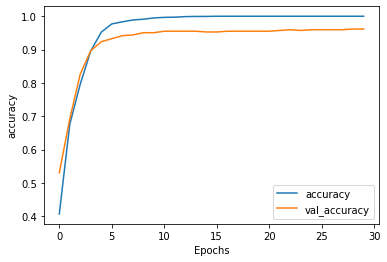

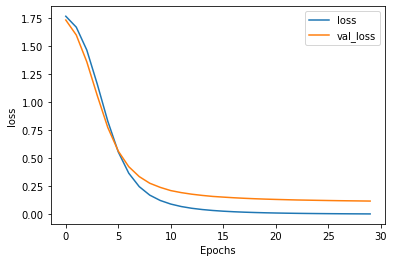

In [18]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [19]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()